# Step 2: Exploratory Data Analysis (EDA)

## 2.1 Summary Statistics & Missing Values

In [ ]:
# Importing libraries
import seaborn as sns

# Displaying the dataset summary
print("Summary Statistics:\n", df_cleaned.describe())

# Checking for missing values
missing_values = df_cleaned.isnull().sum()
print("\nMissing Values:\n", missing_values)


Summary Statistics:
           latitude    longitude  cost_(usd/kwh)  distance_to_city_(km)  \
count  3770.000000  3770.000000     3770.000000            3770.000000   
mean     24.770929     6.291219        0.301836              10.205708   
std      27.008826    91.115992        0.115922               5.588120   
min     -33.899305  -122.499694        0.100000               0.500000   
25%      18.901092   -87.676493        0.200000               5.522500   
50%      37.519318    13.495101        0.300000              10.210000   
75%      41.932186   100.489854        0.400000              14.877500   
max      55.899682   151.314901        0.500000              20.000000   

       usage_stats_(avg_users/day)  charging_capacity_(kw)  installation_year  \
count                  3770.000000             3770.000000        3770.000000   
mean                     55.194430              142.232361        2016.601061   
std                      26.672729              127.642547           

In [ ]:
# Printting column names again before preprocessing
print("Columns in df_cleaned before preprocessing:\n", df_cleaned.columns.tolist())

# Checking if 'availability' column is actually in the DataFrame itself first.
if 'availability' in df_cleaned.columns:
    print("'availability' column exists. Proceeding with preprocessing.")
else:
    print("ERROR: 'availability' column is MISSING. Something is wrong.")


Columns in df_cleaned before preprocessing:
 ['station_id', 'latitude', 'longitude', 'address', 'charger_type', 'cost_(usd/kwh)', 'availability', 'distance_to_city_(km)', 'usage_stats_(avg_users/day)', 'station_operator', 'charging_capacity_(kw)', 'connector_types', 'installation_year', 'renewable_energy_source', 'reviews_(rating)', 'parking_spots', 'maintenance_frequency', 'city']
'availability' column exists. Proceeding with preprocessing.


## 2.2 Renaming Columns to Standard Format

In [ ]:
# Renaming columns to match expected variable names and keeping our work easy
df_cleaned.rename(columns={
    'cost_(usd/kwh)': 'cost_usd_per_kwh',
    'distance_to_city_(km)': 'distance_to_city_km',
    'usage_stats_(avg_users/day)': 'usage_stats_avg_users_per_day',
    'charging_capacity_(kw)': 'charging_capacity_kw',
    'reviews_(rating)': 'reviews_rating'
}, inplace=True)

# Here, we are printing new column names for confirmation
print("Updated Column Names in df_cleaned:\n", df_cleaned.columns)


Updated Column Names in df_cleaned:
 Index(['station_id', 'latitude', 'longitude', 'address', 'charger_type',
       'cost_usd_per_kwh', 'availability', 'distance_to_city_km',
       'usage_stats_avg_users_per_day', 'station_operator',
       'charging_capacity_kw', 'connector_types', 'installation_year',
       'renewable_energy_source', 'reviews_rating', 'parking_spots',
       'maintenance_frequency', 'city'],
      dtype='object')


## 2.3 Preprocessing & Feature Engineering

In [ ]:
# Imporing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Definign a fxn that prepares data for EDA and clustering.
def preprocess_data(df):
    # Printing available column names before any modifications
    print("Columns at START of preprocessing:\n", df.columns.tolist())

    # Converting categorical variables
    categorical_columns = ['installation_year', 'renewable_energy_source', 'availability']
    for col in categorical_columns:
        if col in df.columns:
            df[col] = df[col].astype('category')
        else:
            print(f"Warning: Column '{col}' is missing before conversion.")

    print("Columns after categorical conversion:\n", df.columns.tolist())

    # Normalizing the numerical features
    numerical_columns = ['cost_usd_per_kwh', 'distance_to_city_km', 'usage_stats_avg_users_per_day',
                         'charging_capacity_kw', 'reviews_rating', 'parking_spots']

    # Applying scaling only to existing numerical columns
    existing_numerical_columns = [col for col in numerical_columns if col in df.columns]
    scaler = MinMaxScaler()
    df[existing_numerical_columns] = scaler.fit_transform(df[existing_numerical_columns])

    print("Columns after Normalization:\n", df.columns.tolist())


    # One-Hot Encoding for categorical variables
    categorical_encoding_columns = ['charger_type', 'availability', 'station_operator',
                                    'connector_types', 'maintenance_frequency']

    # Only encoding categorical columns that exist
    existing_categorical_columns = [col for col in categorical_encoding_columns if col in df.columns]

    if existing_categorical_columns:
        df_encoded = pd.get_dummies(df, columns=existing_categorical_columns, drop_first=True)
    else:
        df_encoded = df.copy()

    # Print columns after encoding
    print("Columns AFTER One-Hot Encoding:\n", df_encoded.columns.tolist())

    return df_encoded

df_processed = preprocess_data(df_cleaned)


Columns at START of preprocessing:
 ['station_id', 'latitude', 'longitude', 'address', 'charger_type', 'cost_usd_per_kwh', 'availability', 'distance_to_city_km', 'usage_stats_avg_users_per_day', 'station_operator', 'charging_capacity_kw', 'connector_types', 'installation_year', 'renewable_energy_source', 'reviews_rating', 'parking_spots', 'maintenance_frequency', 'city']
Columns after categorical conversion:
 ['station_id', 'latitude', 'longitude', 'address', 'charger_type', 'cost_usd_per_kwh', 'availability', 'distance_to_city_km', 'usage_stats_avg_users_per_day', 'station_operator', 'charging_capacity_kw', 'connector_types', 'installation_year', 'renewable_energy_source', 'reviews_rating', 'parking_spots', 'maintenance_frequency', 'city']
Columns after Normalization:
 ['station_id', 'latitude', 'longitude', 'address', 'charger_type', 'cost_usd_per_kwh', 'availability', 'distance_to_city_km', 'usage_stats_avg_users_per_day', 'station_operator', 'charging_capacity_kw', 'connector_types

## 2.4 Charging Station Distribution Visualization

In [ ]:
# Defining a fxn that visualizes the spatial distribution of charging stations.
def plot_station_distribution(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['longitude'], df['latitude'], alpha=0.5, s=10, color='blue')
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("EV Charging Stations Distribution")
    plt.grid(True)
    plt.show()


## 2.5 Charging Station Density (Hexbin Plot)

In [ ]:
# Defining a fxn that creates a hexbin map to visualize station density.
def plot_station_density(df):
    plt.figure(figsize=(10, 6))
    hb = plt.hexbin(df['longitude'], df['latitude'], gridsize=50, cmap='Reds', alpha=0.7)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("EV Charging Station Density Map")
    plt.colorbar(hb, label="Density of Charging Stations")
    plt.grid(True)
    plt.show()


## 2.6  Availability Impact on Usage

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# defining a fxn that analyzes the impact of availability on station utilization.
def plot_availability_vs_usage(df):

    # Finding  all one-hot encoded 'availability' columns
    availability_columns = [col for col in df.columns if col.startswith('availability_')]

    if not availability_columns:
        print("No availability columns found after encoding. Skipping this plot.")
        return

    # Convertingf one-hot encoding back to categorical labels
    df['availability_category'] = df[availability_columns].idxmax(axis=1).str.replace('availability_', '')
    # plotting
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df['availability_category'], y=df['usage_stats_avg_users_per_day'])
    plt.xlabel("Availability Hours")
    plt.ylabel("Average Users Per Day")
    plt.title("Impact of Availability on Station Utilization")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


## 2.7 Usage Distribution

In [ ]:
# Defining a fxn that shows the distribution of charging station usage.
def plot_usage_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['usage_stats_avg_users_per_day'], bins=30, kde=True, color="red")
    plt.xlabel("Average Users Per Day")
    plt.ylabel("Count of Stations")
    plt.title("Distribution of Charging Station Utilization")
    plt.grid(True)
    plt.show()


## 2.8 Correlation Analysis

In [ ]:
# Defining a fxn that plots a heatmap of feature correlations.
def plot_correlation_matrix(df):
    correlation_features = ['latitude', 'longitude', 'distance_to_city_km',
                            'usage_stats_avg_users_per_day', 'cost_usd_per_kwh',
                            'charging_capacity_kw', 'reviews_rating']

    correlation_matrix = df[correlation_features].corr()

    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.show()

    return correlation_matrix


## 2.9 Full EDA Execution

Columns at START of preprocessing:
 ['station_id', 'latitude', 'longitude', 'address', 'charger_type', 'cost_usd_per_kwh', 'availability', 'distance_to_city_km', 'usage_stats_avg_users_per_day', 'station_operator', 'charging_capacity_kw', 'connector_types', 'installation_year', 'renewable_energy_source', 'reviews_rating', 'parking_spots', 'maintenance_frequency', 'city']
Columns after categorical conversion:
 ['station_id', 'latitude', 'longitude', 'address', 'charger_type', 'cost_usd_per_kwh', 'availability', 'distance_to_city_km', 'usage_stats_avg_users_per_day', 'station_operator', 'charging_capacity_kw', 'connector_types', 'installation_year', 'renewable_energy_source', 'reviews_rating', 'parking_spots', 'maintenance_frequency', 'city']
Columns after Normalization:
 ['station_id', 'latitude', 'longitude', 'address', 'charger_type', 'cost_usd_per_kwh', 'availability', 'distance_to_city_km', 'usage_stats_avg_users_per_day', 'station_operator', 'charging_capacity_kw', 'connector_types

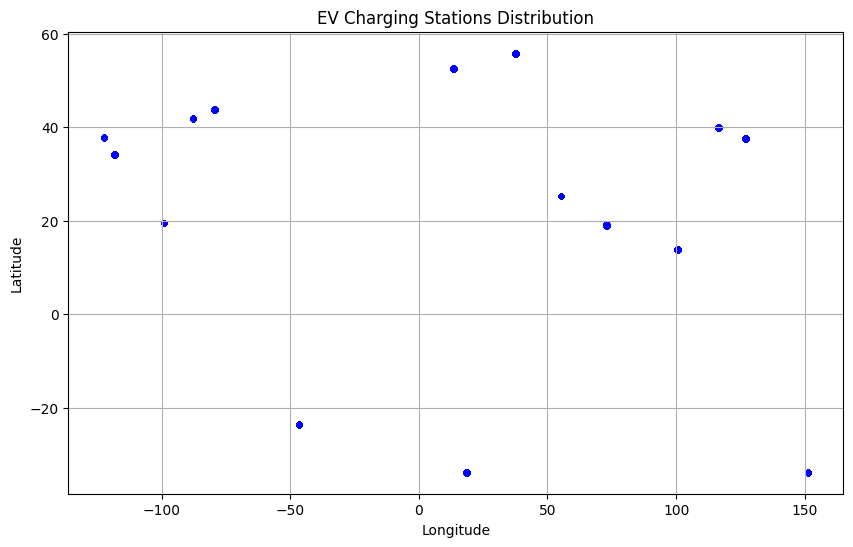

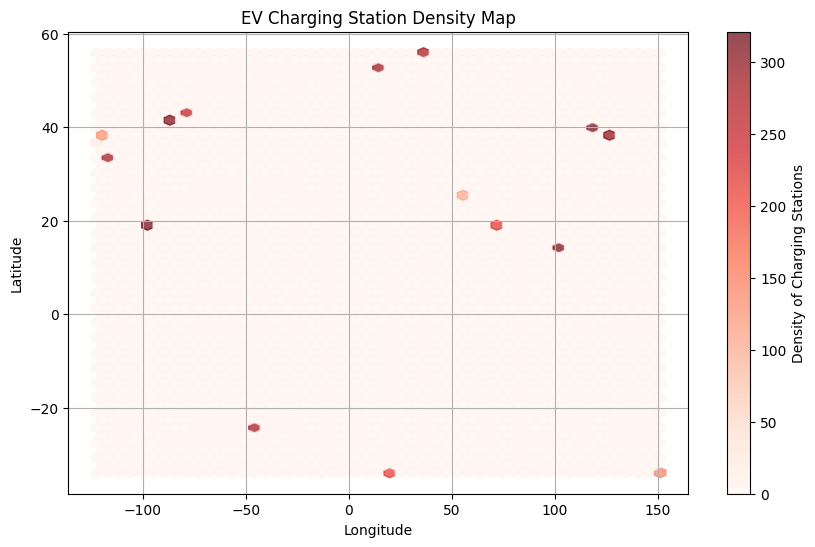

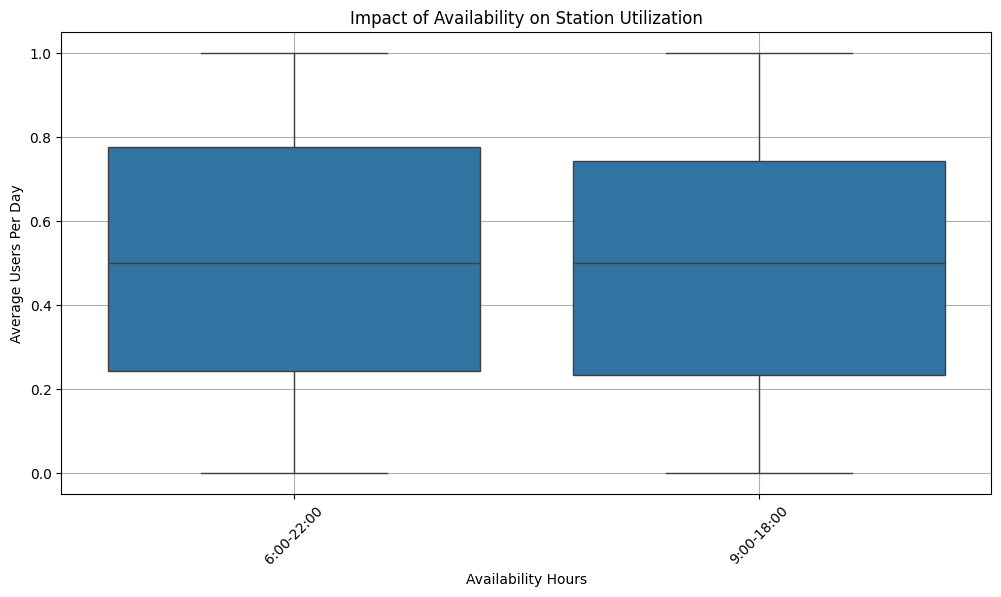

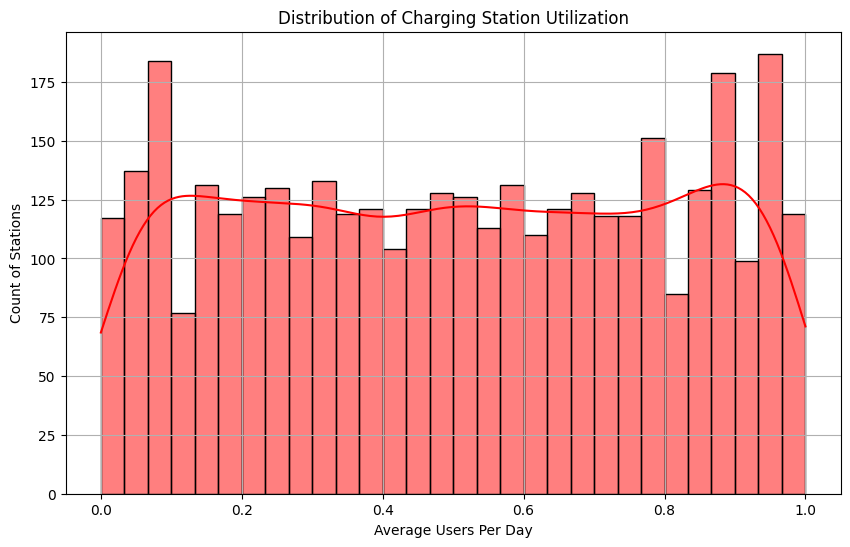

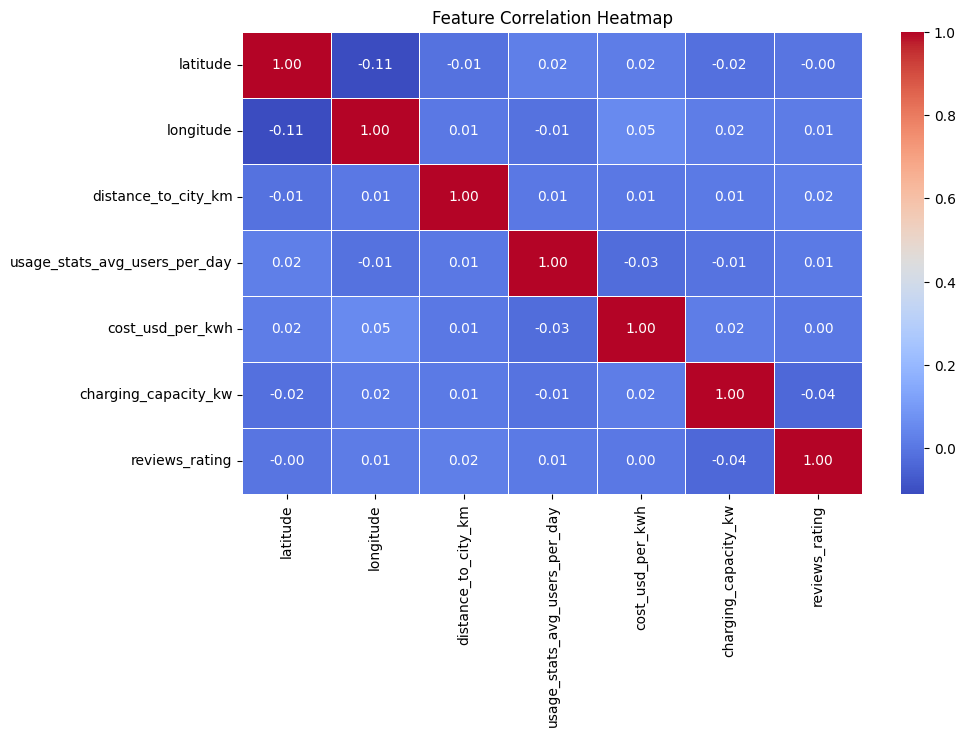

EDA Complete.


In [ ]:
# Running preprocessing after renaming columns
df_processed = preprocess_data(df_cleaned)

# Running EDA only and only if preprocessing was successful
if df_processed is not None:
    plot_station_distribution(df_processed)
    plot_station_density(df_processed)
    plot_availability_vs_usage(df_processed)
    plot_usage_distribution(df_processed)
    correlation_matrix = plot_correlation_matrix(df_processed)
    # Prinint the status of EDA
    print("EDA Complete.")

